# Linear Classifiers

Perform sentiment analysis on a corpus of book reviews from Amazon.

<b> Exercise 1.1 - Generative Classifiers: Naıve Bayes </b> 
<br>
In this exercise we will use the Amazon sentiment analysis data (Blitzer et al., 2007), where the goal is to classify text documents as expressing a positive or negative sentiment (i.e., a classification problem with two classes). We are going to focus on book reviews.

In [1]:
import lxmls.readers.sentiment_reader as srs
scr = srs.SentimentCorpus("books")

In [2]:
import numpy as np
from __future__ import division
print "My instances to train have the shape", np.shape(scr.train_X), "and are the following:\n", scr.train_X
print "\n Their targets/outputs belongo to the classes", np.unique(scr.train_y),"and are the following:\n", scr.train_y 

print "\n My instances to test have the shape", np.shape(scr.test_X)

print '\nSo, each instance (row) represents a doc, being the doc represented as a bag-of-words  (each collum represents the freq of that word in that doc). Each document can either be classified as positive or a negative sentiment (1, ou 0, respectively).'

My instances to train have the shape (1600, 13989) and are the following:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 Their targets/outputs belongo to the classes [0 1] and are the following:
[[0]
 [1]
 [0]
 ...
 [1]
 [0]
 [1]]

 My instances to test have the shape (400, 13989)

So, each instance (row) represents a doc, being the doc represented as a bag-of-words  (each collum represents the freq of that word in that doc). Each document can either be classified as positive or a negative sentiment (1, ou 0, respectively).


 > Implement the Naive Bayes algorithm. Open the file multinomial naive bayes.py, which is inside the classifiers folder. In the MultinomialNaiveBayes class you will find the train method. We have already placed some code in that file to help you get started.

In [3]:
#This is the code that I implemented in the train method:
''' what was given, where x and y where scr.train_X and trainY:'''
x=scr.train_X
y=scr.train_y
# n_docs = no. of documents
# n_words = no. of unique words
n_docs, n_words = x.shape
# classes = a list of possible classes
classes = np.unique(y)
# n_classes = no. of classes
n_classes = np.unique(y).shape[0]

# initialization of the prior and likelihood variables
prior = np.zeros(n_classes)
likelihood = np.zeros((n_words, n_classes))

'''my solution'''

for i in range(n_classes):
    docs_of_class=x[np.where(y==classes[i])[0]] 

    prior[i]=len(docs_of_class)/n_docs

    freq_of_each_word=docs_of_class.sum(0)  #[freq_w1, freq_w2, etc]
    likelihood[:,i]=freq_of_each_word/ freq_of_each_word.sum()

> After implementing, run NaiveBayes with the multinomial model on the Amazon dataset(sentiment classification) and report results both for training and testing:

In [4]:
smoothing=False 

import lxmls.classifiers.multinomial_naive_bayes as mnbb
mnb = mnbb.MultinomialNaiveBayes()
params_nb_sc = mnb.train(scr.train_X,scr.train_y, smoothing)
y_pred_train = mnb.test(scr.train_X,params_nb_sc)
acc_train = mnb.evaluate(scr.train_y, y_pred_train)
y_pred_test = mnb.test(scr.test_X,params_nb_sc)
acc_test = mnb.evaluate(scr.test_y, y_pred_test)
print "Multinomial Naive Bayes Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,acc_test)

lxmls/classifiers/multinomial_naive_bayes.py:65: RuntimeWarning: divide by zero encountered in log
  params[1:, i] = np.nan_to_num(np.log(likelihood[:, i]))


Multinomial Naive Bayes Amazon Sentiment Accuracy train: 0.987500 test: 0.635000


> Observe that words that were not observed at training time cause problems at test time. Why? To solve this problem, apply a simple add-one smoothing technique

Basically, I changed the code related to the likelihood to be:
   <br>
   likelihood[:,i]=(1+freq_of_each_word)/ (freq_of_each_word.sum()+n_words)

In [5]:
smoothing=True 

import lxmls.classifiers.multinomial_naive_bayes as mnbb
mnb = mnbb.MultinomialNaiveBayes()
params_nb_sc = mnb.train(scr.train_X,scr.train_y,smoothing)
y_pred_train = mnb.test(scr.train_X,params_nb_sc)
acc_train = mnb.evaluate(scr.train_y, y_pred_train)
y_pred_test = mnb.test(scr.test_X,params_nb_sc)
acc_test = mnb.evaluate(scr.test_y, y_pred_test)
print "Multinomial Naive Bayes Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,acc_test)

Multinomial Naive Bayes Amazon Sentiment Accuracy train: 0.974375 test: 0.840000


<b> Exercise 1.2 - Perceptron </b>
<br>
We provide an implementation of the perceptron algorithm in the class Perceptron (file perceptron.py).

> Run the following commands to generate a simple dataset similar to the one plotted on Figure 1.1:

In [6]:
import lxmls.readers.simple_data_set as sds
sd = sds.SimpleDataSet(nr_examples=100, g1 = [[-1,-1],1], g2 = [[1,1],1], balance=0.5, split=[0.5,0,0.5])

> Run the perceptron algorithm on the simple dataset previously generated and report its train and test set accuracy:

In [7]:
import lxmls.classifiers.perceptron as percc
perc = percc.Perceptron()
params_perc_sd = perc.train(sd.train_X,sd.train_y)
y_pred_train = perc.test(sd.train_X,params_perc_sd)
acc_train = perc.evaluate(sd.train_y, y_pred_train)
y_pred_test = perc.test(sd.test_X,params_perc_sd)
acc_test = perc.evaluate(sd.test_y, y_pred_test)
print "Perceptron Simple Dataset Accuracy train: %f test: %f"%(acc_train,acc_test)

Rounds: 0 Accuracy: 0.920000
Rounds: 1 Accuracy: 0.960000
Rounds: 2 Accuracy: 0.940000
Rounds: 3 Accuracy: 0.900000
Rounds: 4 Accuracy: 0.920000
Rounds: 5 Accuracy: 0.980000
Rounds: 6 Accuracy: 0.920000
Rounds: 7 Accuracy: 0.980000
Rounds: 8 Accuracy: 0.900000
Rounds: 9 Accuracy: 0.920000
Perceptron Simple Dataset Accuracy train: 0.960000 test: 0.900000


> Plot the decision boundary found:

In [8]:
import matplotlib.pyplot as plt
fig,axis = sd.plot_data()
fig,axis = sd.add_line(fig,axis,params_perc_sd,"Perceptron","blue")

[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]


> Run the perceptron algorithm on the Amazon dataset.

In [9]:
params_perc_scr = perc.train(scr.train_X,scr.train_y)
y_pred_train = perc.test(scr.train_X,params_perc_scr)
acc_train = perc.evaluate(scr.train_y, y_pred_train)
y_pred_test = perc.test(scr.test_X,params_perc_scr)
acc_test = perc.evaluate(scr.test_y, y_pred_test)
print "Perceptron Simple Dataset Accuracy train: %f test: %f"%(acc_train,acc_test)

Rounds: 0 Accuracy: 0.870000
Rounds: 1 Accuracy: 0.940000
Rounds: 2 Accuracy: 0.979375
Rounds: 3 Accuracy: 0.965625
Rounds: 4 Accuracy: 0.989375
Rounds: 5 Accuracy: 0.996250
Rounds: 6 Accuracy: 0.995000
Rounds: 7 Accuracy: 0.999375
Rounds: 8 Accuracy: 0.996250
Rounds: 9 Accuracy: 0.998125
Perceptron Simple Dataset Accuracy train: 0.998750 test: 0.825000


<b> Exercise 1.3 - Margin Infused Relaxed Algorithm (MIRA)</b>
<br>
We provide an implementation of the MIRA algorithm. 

In [10]:
import lxmls.classifiers.mira as mirac
mira = mirac.Mira()

In [11]:
params_mira_sd={}
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,2]:
    mira.regularizer = i# This is lambda
    print "\nlambda", i
    params_mira_sd[i] = mira.train(sd.train_X,sd.train_y)
    y_pred_train = mira.test(sd.train_X,params_mira_sd[i])
    acc_train = mira.evaluate(sd.train_y, y_pred_train)
    y_pred_test = mira.test(sd.test_X,params_mira_sd[i])
    acc_test = mira.evaluate(sd.test_y, y_pred_test)
    print "Mira Simple Dataset Accuracy train: %f test: %f"%(acc_train,acc_test)


lambda 0.1
Rounds: 0 Accuracy: 0.980000
Rounds: 1 Accuracy: 0.980000
Rounds: 2 Accuracy: 0.960000
Rounds: 3 Accuracy: 0.980000
Rounds: 4 Accuracy: 0.980000
Rounds: 5 Accuracy: 0.940000
Rounds: 6 Accuracy: 0.980000
Rounds: 7 Accuracy: 0.980000
Rounds: 8 Accuracy: 0.980000
Rounds: 9 Accuracy: 0.960000
Mira Simple Dataset Accuracy train: 0.980000 test: 0.880000

lambda 0.2
Rounds: 0 Accuracy: 0.980000
Rounds: 1 Accuracy: 0.980000
Rounds: 2 Accuracy: 0.960000
Rounds: 3 Accuracy: 0.960000
Rounds: 4 Accuracy: 0.960000
Rounds: 5 Accuracy: 0.960000
Rounds: 6 Accuracy: 0.960000
Rounds: 7 Accuracy: 0.960000
Rounds: 8 Accuracy: 0.960000
Rounds: 9 Accuracy: 0.960000
Mira Simple Dataset Accuracy train: 0.960000 test: 0.880000

lambda 0.3
Rounds: 0 Accuracy: 0.980000
Rounds: 1 Accuracy: 0.980000
Rounds: 2 Accuracy: 0.980000
Rounds: 3 Accuracy: 0.960000
Rounds: 4 Accuracy: 0.960000
Rounds: 5 Accuracy: 0.940000
Rounds: 6 Accuracy: 0.960000
Rounds: 7 Accuracy: 0.960000
Rounds: 8 Accuracy: 0.980000
Rou

> Compare it with the perceptron for various values of lambda

Comparing it with various values of lambda, we can see that lower values (lower penalizations) lead to highest accuracies, being the best value in this case a lambda of >0.1. Comparing it with perceptron, we can observe similar results, being slightly better the MIRA. Plotting the decision boundary:

[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]


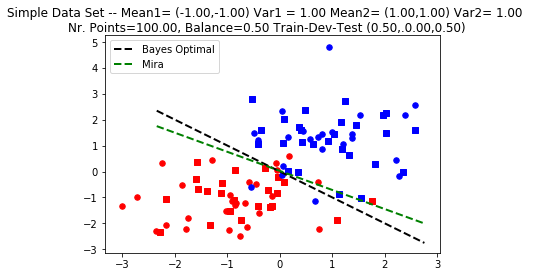

In [12]:
fig,axis = sd.plot_data()
fig,axis = sd.add_line(fig,axis,params_mira_sd[0.2],"Mira","green")

Therefore, I have selected a lambda of 0.1 for Amazon dataset, leading to an accuracy of 0.75, which outperforms the default value (0.1 would lead to an accuracy of 0.5).

In [13]:
mira.regularizer = 0.1 # This is lambda
params_mira_sc = mira.train(scr.train_X,scr.train_y)
y_pred_train = mira.test(scr.train_X,params_mira_sc)
acc_train = mira.evaluate(scr.train_y, y_pred_train)
y_pred_test = mira.test(scr.test_X,params_mira_sc)
acc_test = mira.evaluate(scr.test_y, y_pred_test)
print "Mira Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,acc_test)

Rounds: 0 Accuracy: 0.707500
Rounds: 1 Accuracy: 0.740625
Rounds: 2 Accuracy: 0.743125
Rounds: 3 Accuracy: 0.811875
Rounds: 4 Accuracy: 0.770000
Rounds: 5 Accuracy: 0.810625
Rounds: 6 Accuracy: 0.843750
Rounds: 7 Accuracy: 0.868750
Rounds: 8 Accuracy: 0.890000
Rounds: 9 Accuracy: 0.868125
Mira Amazon Sentiment Accuracy train: 0.886875 test: 0.755000


<b> Exercise 1.4 -Maximum Entropy Classifiers </b>
<br>
We provide an implementation of the L-BFGS algorithm for training maximum entropy models in the class
MaxEnt batch, as well as an implementation of the SGD algorithm in the class MaxEnt online.

> Train a maximum entropy model using L-BFGS on the Simple data set (try different values of lambda). Compare the results with the previous methods.

In [14]:
import lxmls.classifiers.max_ent_batch as mebc
me_lbfgs = mebc.MaxEntBatch()

In [15]:
params_meb_sd={}
for i in [0.1,0.2,0.5,1,1.5,2,5,7,10,20]:
    me_lbfgs.regularizer = i
    print "\nlambda", i
    params_meb_sd[i] = me_lbfgs.train(sd.train_X,sd.train_y)
    y_pred_train = me_lbfgs.test(sd.train_X,params_meb_sd[i])
    acc_train = me_lbfgs.evaluate(sd.train_y, y_pred_train)
    y_pred_test = me_lbfgs.test(sd.test_X,params_meb_sd[i])
    acc_test = me_lbfgs.evaluate(sd.test_y, y_pred_test)
    print "Max-Ent batch Simple Dataset Accuracy train: %f test: %f"%(acc_train,acc_test)


lambda 0.1
Objective = 0.69314718056
Objective = 0.26657862166
Objective = 0.259389716331
Objective = 0.255341989834
Objective = 0.255263818238
Objective = 0.255263232379
Max-Ent batch Simple Dataset Accuracy train: 0.960000 test: 0.880000

lambda 0.2
Objective = 0.69314718056
Objective = 0.31657862166
Objective = 0.314803610986
Objective = 0.314003106634
Objective = 0.314001015265
Objective = 0.314000839548
Objective = 0.314000833354
Max-Ent batch Simple Dataset Accuracy train: 0.960000 test: 0.880000

lambda 0.5
Objective = 0.69314718056
Objective = 0.46657862166
Objective = 0.411719078861
Objective = 0.406186565302
Objective = 0.406002938231
Objective = 0.406002317889
Objective = 0.406002311973
Objective = 0.406002311748
Max-Ent batch Simple Dataset Accuracy train: 0.960000 test: 0.880000

lambda 1
Objective = 0.69314718056
Objective = 0.71657862166
Objective = 0.480443648508
Objective = 0.480034826362
Objective = 0.47997957726
Objective = 0.479979566099
Objective = 0.479979565901


Comparing it with various values of lambda, we can see that higher values lead to highest accuracies, being the best value in this case a lambda of value > 7. In general the results were similar to the previous methods. Plotting the decision boundary:

[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]


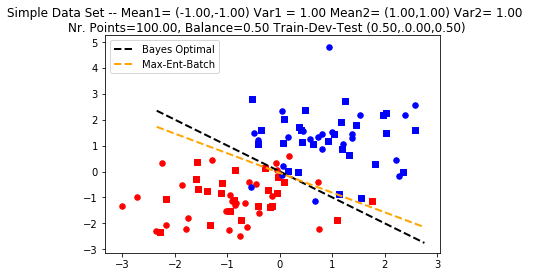

In [16]:
fig,axis = sd.plot_data()
fig,axis = sd.add_line(fig,axis,params_meb_sd[7],"Max-Ent-Batch","orange")

> Train a maximum entropy model using L-BFGS, on the Amazon dataset (try different values of lambda) and report training and test set accuracy.

In [17]:
for i in [0.1,0.2,0.5,1,1.5,2,5,7,10]:
    me_lbfgs.regularizer = i
    print "\nlambda", i
    params_meb_sc = me_lbfgs.train(scr.train_X,scr.train_y)
    y_pred_train = me_lbfgs.test(scr.train_X,params_meb_sc)
    acc_train = me_lbfgs.evaluate(scr.train_y, y_pred_train)
    y_pred_test = me_lbfgs.test(scr.test_X,params_meb_sc)
    acc_test = me_lbfgs.evaluate(scr.test_y, y_pred_test)
    print "Max-Ent Batch Amazon Sentiment Accuracy train: %f test: %f"%(acc_train, acc_test)


lambda 0.1
Objective = 0.69314718056
Objective = 1.90699359189
Objective = 0.685029648463
Objective = 0.656557258704
Objective = 0.604058977281
Objective = 0.560811187932
Objective = 0.493687772872
Objective = 0.469150827084
Objective = 0.462501381016
Objective = 0.456638713756
Objective = 0.451318239921
Objective = 0.445698711637
Objective = 0.445229017585
Objective = 0.44336346625
Objective = 0.443142461258
Objective = 0.442900262392
Objective = 0.443255083097
Objective = 0.44285207403
Objective = 0.442817981431
Objective = 0.442782761217
Objective = 0.442748084594
Objective = 0.442735379598
Objective = 0.442734058558
Objective = 0.442730979411
Objective = 0.442730633963
Objective = 0.442730052705
Objective = 0.44272965541
Objective = 0.442729940738
Objective = 0.442729583716
Objective = 0.44272964509
Objective = 0.442729558261
Objective = 0.442729532572
Objective = 0.442729514399
Objective = 0.442729483577
Objective = 0.44272946889
Objective = 0.442729469601
Objective = 0.442729466

> What do you observe?

Comparing it with various values of lambda, we can see that lower values lead to highest accuracies, being the best value in this case a lambda of 0.1.

> Now, fix lambda = 1.0 and train with SGD (you might try to adjust the initial step).

In [18]:
import lxmls.classifiers.max_ent_online as meoc
me_sgd = meoc.MaxEntOnline()

In [19]:
me_sgd.regularizer = 1.0
params_meo_sc = me_sgd.train(scr.train_X,scr.train_y)
y_pred_train = me_sgd.test(scr.train_X,params_meo_sc)
acc_train = me_sgd.evaluate(scr.train_y, y_pred_train)
y_pred_test = me_sgd.test(scr.test_X,params_meo_sc)
acc_test = me_sgd.evaluate(scr.test_y, y_pred_test)
print "Max-Ent Online Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,
acc_test)

Epochs: 0 Objective: 1.169629
Epochs: 0 Accuracy: 0.821875
Epochs: 1 Objective: 0.646076
Epochs: 1 Accuracy: 0.850000
Epochs: 2 Objective: 0.635095
Epochs: 2 Accuracy: 0.861250
Epochs: 3 Objective: 0.631180
Epochs: 3 Accuracy: 0.860000
Epochs: 4 Objective: 0.629128
Epochs: 4 Accuracy: 0.861875
Epochs: 5 Objective: 0.627862
Epochs: 5 Accuracy: 0.861250
Epochs: 6 Objective: 0.627001
Epochs: 6 Accuracy: 0.861250
Epochs: 7 Objective: 0.626376
Epochs: 7 Accuracy: 0.860625
Epochs: 8 Objective: 0.625902
Epochs: 8 Accuracy: 0.860625
Epochs: 9 Objective: 0.625529
Epochs: 9 Accuracy: 0.860625
Max-Ent Online Amazon Sentiment Accuracy train: 0.860625 test: 0.787500


<b> Exercise 1.4 -Support Vector Machines (SVM) </b>
<br>
Implement the SVM primal algorithm (Hint: look at the models implemented earlier, you should only need to change a few lines of code). Do this by creating a file SVM.py and implement class SVM. 

Round: 0 Objective: 0.717175
Round: 0 Accuracy: 0.980000
Round: 1 Objective: 0.489933
Round: 1 Accuracy: 0.960000
Round: 2 Objective: 0.488204
Round: 2 Accuracy: 0.960000
Round: 3 Objective: 0.477311
Round: 3 Accuracy: 0.960000
Round: 4 Objective: 0.469614
Round: 4 Accuracy: 0.960000
Round: 5 Objective: 0.467796
Round: 5 Accuracy: 0.940000
Round: 6 Objective: 0.466594
Round: 6 Accuracy: 0.940000
Round: 7 Objective: 0.465741
Round: 7 Accuracy: 0.940000
Round: 8 Objective: 0.464014
Round: 8 Accuracy: 0.940000
Round: 9 Objective: 0.463316
Round: 9 Accuracy: 0.940000
SVM Online Simple Dataset Accuracy train: 0.940000 test: 0.880000
[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]


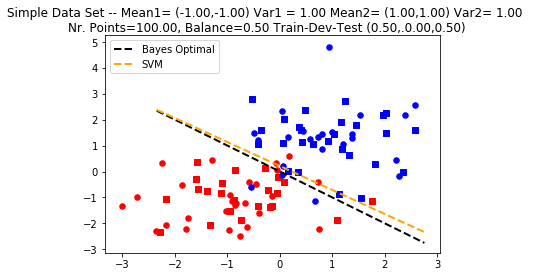

In [20]:
import lxmls.classifiers.mysvm as svmc
svm = svmc.SVM()
svm.regularizer = 1.0 # This is lambda
params_svm_sd = svm.train(sd.train_X,sd.train_y)
y_pred_train = svm.test(sd.train_X,params_svm_sd)
acc_train = svm.evaluate(sd.train_y, y_pred_train)
y_pred_test = svm.test(sd.test_X,params_svm_sd)
acc_test = svm.evaluate(sd.test_y, y_pred_test)
print "SVM Online Simple Dataset Accuracy train: %f test: %f"%(acc_train,acc_test)
fig,axis = sd.plot_data()
fig,axis = sd.add_line(fig,axis,params_svm_sd,"SVM","orange")

In [21]:
params_svm_sc = svm.train(scr.train_X,scr.train_y)
y_pred_train = svm.test(scr.train_X,params_svm_sc)
acc_train = svm.evaluate(scr.train_y, y_pred_train)
y_pred_test = svm.test(scr.test_X,params_svm_sc)
acc_test = svm.evaluate(scr.test_y, y_pred_test)
print "SVM Online Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,acc_test)

Round: 0 Objective: 4.153706
Round: 0 Accuracy: 0.863125
Round: 1 Objective: 1.318255
Round: 1 Accuracy: 0.878125
Round: 2 Objective: 1.204551
Round: 2 Accuracy: 0.888125
Round: 3 Objective: 1.157584
Round: 3 Accuracy: 0.894375
Round: 4 Objective: 1.131977
Round: 4 Accuracy: 0.886875
Round: 5 Objective: 1.115366
Round: 5 Accuracy: 0.884375
Round: 6 Objective: 1.102585
Round: 6 Accuracy: 0.897500
Round: 7 Objective: 1.091488
Round: 7 Accuracy: 0.891250
Round: 8 Objective: 1.090866
Round: 8 Accuracy: 0.896250
Round: 9 Objective: 1.084450
Round: 9 Accuracy: 0.894375
SVM Online Amazon Sentiment Accuracy train: 0.894375 test: 0.812500
